In [ ]:
'''

Análisis de otros factores externos: ¿INFLUYE EL SUELO DE LA PISTA?

'''

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")

In [14]:
df_agility = pd.read_csv("./data/6_DATA_AGILITY.csv")

In [15]:
df_agility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32611 entries, 0 to 32610
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indice             32611 non-null  int64  
 1   Index_data         32611 non-null  int64  
 2   Fecha              32611 non-null  object 
 3   License            32611 non-null  object 
 4   Breed              32611 non-null  object 
 5   Gender             32611 non-null  object 
 6   Hight_cm           32611 non-null  float64
 7   Classification     32611 non-null  object 
 8   Speed m/s          32611 non-null  float64
 9   Time (s)           32611 non-null  float64
 10  Faults             32611 non-null  int64  
 11  Refusals           32611 non-null  int64  
 12  Competition        32611 non-null  object 
 13  Location           32611 non-null  object 
 14  Roof               32611 non-null  object 
 15  Floor              32611 non-null  object 
 16  Eliminados         326

In [16]:
# ANALISIS factores externos: Fecha_Competición/ Competition / Location / Roof / Floor

In [17]:
df_agility["Floor"].value_counts()

Floor
Synthetic grass    17048
Natural grass      11344
Clay                3163
Sand                 897
Riding arena         159
Name: count, dtype: int64

In [18]:
df_agility.groupby("Floor")["Eliminados"].value_counts()


Floor            Eliminados
Clay             EXC_0         1205
                 ELIM           879
                 EXC            623
                 V_GOOD         368
                 GOOD            59
                 NP              29
Natural grass    EXC_0         4033
                 ELIM          3296
                 EXC           2219
                 V_GOOD        1491
                 GOOD           221
                 NP              84
Riding arena     EXC_0           72
                 ELIM            38
                 EXC             27
                 V_GOOD          14
                 GOOD             4
                 NP               4
Sand             EXC_0          340
                 ELIM           207
                 EXC            191
                 V_GOOD          89
                 NP              42
                 GOOD            28
Synthetic grass  EXC_0         6322
                 ELIM          4637
                 EXC           3412


In [19]:
df_agility.groupby("Floor")["Faults"].value_counts()

Floor            Faults
Clay             0         1614
                 100        879
                 1          495
                 2          132
                 3           34
                 4            9
Natural grass    0         5391
                 100       3296
                 1         1887
                 2          565
                 3          141
                 4           57
                 5            7
Riding arena     0           89
                 100         38
                 1           19
                 2           11
                 4            2
Sand             0          503
                 100        207
                 1          134
                 2           33
                 3           14
                 4            6
Synthetic grass  0         8494
                 100       4637
                 1         2798
                 2          766
                 3          263
                 4           74
                

In [20]:
df_agility.groupby("Floor")["Refusals"].value_counts()

Floor            Refusals
Clay             0           1816
                 100          879
                 1            386
                 2             82
Natural grass    0           6191
                 100         3296
                 1           1514
                 2            343
Riding arena     0            104
                 100           38
                 1             15
                 2              2
Sand             0            529
                 100          207
                 1            129
                 2             28
                 4              4
Synthetic grass  0           9671
                 100         4637
                 1           2206
                 2            532
                 3              2
Name: count, dtype: int64

In [33]:
df_terra = df_agility[["Floor", "Eliminados", "Faults", "Refusals"]]

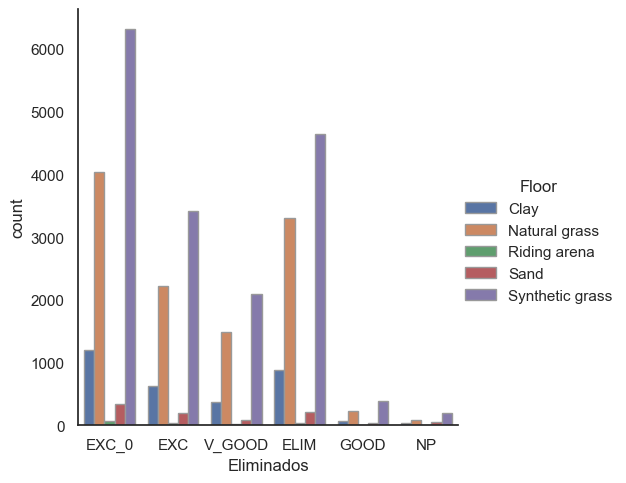

In [27]:
sns.catplot(x="Eliminados",
            hue="Floor",
            kind="count",
            edgecolor=".6",
            orient="V",
            data=df_terra.sort_values("Floor"));

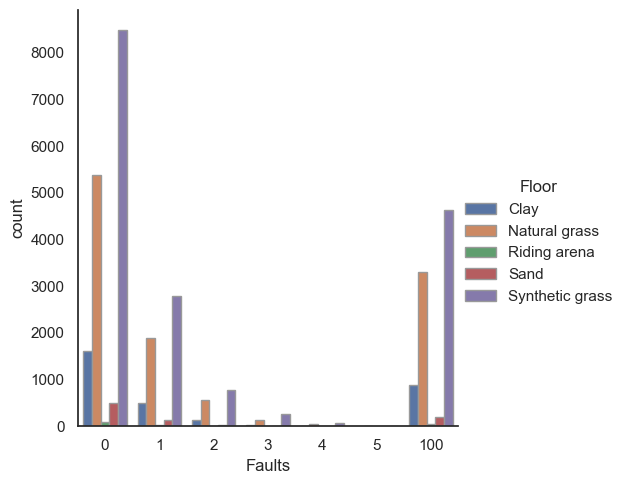

In [34]:
sns.catplot(x="Faults",
            hue="Floor",
            kind="count",
            edgecolor=".6",
            orient="V",
            data=df_terra.sort_values("Floor"));

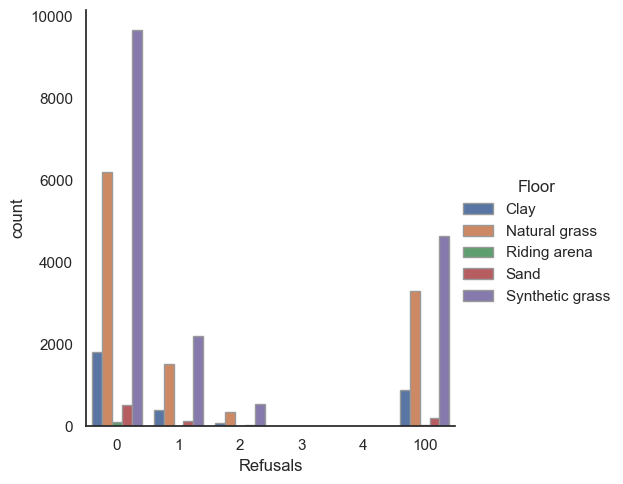

In [35]:
sns.catplot(x="Refusals",
            hue="Floor",
            kind="count",
            edgecolor=".6",
            orient="V",
            data=df_terra.sort_values("Floor"));

In [38]:
df_terra.value_counts("Floor")

Floor
Synthetic grass    17048
Natural grass      11344
Clay                3163
Sand                 897
Riding arena         159
Name: count, dtype: int64

In [95]:
dic_terra = {
    "Index":["EXC_0", "ELIM", "EXC", "V_GOOD", "GOOD", "NP"],
    "Clay": [],
    "Natural grass": [],
    "Riding arena": [],
    "Sand":[],
    "Synthetic grass":[]
}

df_terra_elim = df_terra.groupby("Floor")["Eliminados"].value_counts()

for a,b in df_terra_elim.items():
    dic_terra[a[0]].append(b)

In [96]:
df_dic_terra = pd.DataFrame(dic_terra)
df_dic_terra

,Index,Clay,Natural grass,Riding arena,Sand,Synthetic grass
0,EXC_0,1205,4033,72,340,6322
1,ELIM,879,3296,38,207,4637
2,EXC,623,2219,27,191,3412
3,V_GOOD,368,1491,14,89,2093
4,GOOD,59,221,4,42,388
5,NP,29,84,4,28,196


In [149]:
df_terra_relativo = pd.DataFrame()
for a,b in df_dic_terra.items():
    if a == "Clay":
        df_terra_relativo["Clay"] = round(b / 3163 * 100, 2)
    if a == "Natural grass":
        df_terra_relativo["Natural grass"] = round(b / 11344 * 100, 2)
    if a == "Riding arena":
        df_terra_relativo["Riding arena"] = round(b / 159 * 100, 2)
    if a == "Sand":
        df_terra_relativo["Sand"] = round(b / 897 * 100, 2)
    if a == "Synthetic grass":
        df_terra_relativo["Synthetic grass"] = round(b / 17048 * 100, 2)

In [150]:
df_terra_relativo

,Clay,Natural grass,Riding arena,Sand,Synthetic grass
0,38.10,35.55,45.28,37.90,37.08
1,27.79,29.06,23.90,23.08,27.20
2,19.70,19.56,16.98,21.29,20.01
3,11.63,13.14,8.81,9.92,12.28
4,1.87,1.95,2.52,4.68,2.28


In [153]:
df_terra_relativo["calif."] = ["EXC_0", "ELIM", "EXC", "V_GOOD", "GOOD"]

In [160]:
df_terra_relativo = df_terra_relativo.T
df_terra_relativo.columns = df_terra_relativo.iloc[-1]
df_terra_relativo

calif.,EXC_0,ELIM,EXC,V_GOOD,GOOD
Clay,38.1,27.79,19.7,11.63,1.87
Natural grass,35.55,29.06,19.56,13.14,1.95
Riding arena,45.28,23.9,16.98,8.81,2.52
Sand,37.9,23.08,21.29,9.92,4.68
Synthetic grass,37.08,27.2,20.01,12.28,2.28
calif.,EXC_0,ELIM,EXC,V_GOOD,GOOD


In [162]:
df_terra_relativo = df_terra_relativo.drop(df_terra_relativo.index[-1])

In [163]:
'''
Synthetic grass    17048
Natural grass      11344
Clay                3163
Sand                 897
Riding arena         159
'''

'\nSynthetic grass    17048\nNatural grass      11344\nClay                3163\nSand                 897\nRiding arena         159\n'

In [164]:
df_terra_relativo

calif.,EXC_0,ELIM,EXC,V_GOOD,GOOD
Clay,38.1,27.79,19.7,11.63,1.87
Natural grass,35.55,29.06,19.56,13.14,1.95
Riding arena,45.28,23.9,16.98,8.81,2.52
Sand,37.9,23.08,21.29,9.92,4.68
Synthetic grass,37.08,27.2,20.01,12.28,2.28


In [140]:
def fig_terra (data):

    eliminados_terra = data.sort_values(by="ELIM", ascending=True)

    sns.barplot(y= eliminados_terra.index, x= eliminados_terra["ELIM"], hue= eliminados_terra["ELIM"], legend=False, palette= "tab20b")
    plt.xlim(0,100)
    plt.title("Probabilidad de Eliminado")
    plt.ylabel("")
    plt.xlabel("")
    plt.xticks([])
    sns.despine(left=True, bottom=True)

    for i, valor in enumerate(eliminados_terra["ELIM"]):
        plt.text(valor, i, f"{round(valor, 2)}%", ha='left', va='center')

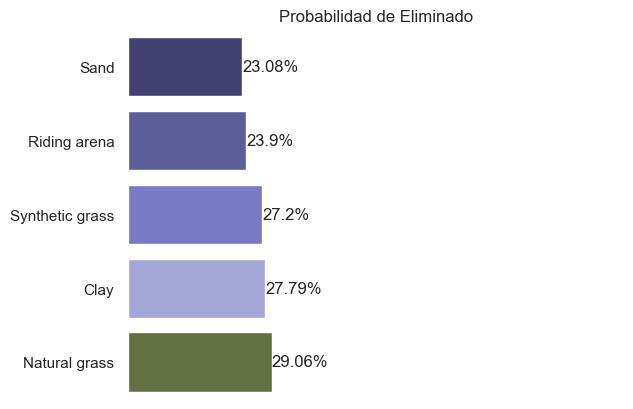

In [169]:
fig_terra(df_terra_relativo)
plt.savefig('./img/Suelo_elim.png', bbox_inches='tight')

In [ ]:
def fig_terra (data):

    eliminados_terra = data.sort_values(by="ELIM", ascending=True)

    sns.barplot(y= eliminados_terra.index, x= eliminados_terra["ELIM"], hue= eliminados_terra["ELIM"], legend=False, palette= "tab20b")
    plt.xlim(0,100)
    plt.title("Probabilidad de Eliminado")
    plt.ylabel("")
    plt.xlabel("")
    plt.xticks([])
    sns.despine(left=True, bottom=True)

    for i, valor in enumerate(eliminados_terra["ELIM"]):
        plt.text(valor, i, f"{round(valor, 2)}%", ha='left', va='center')

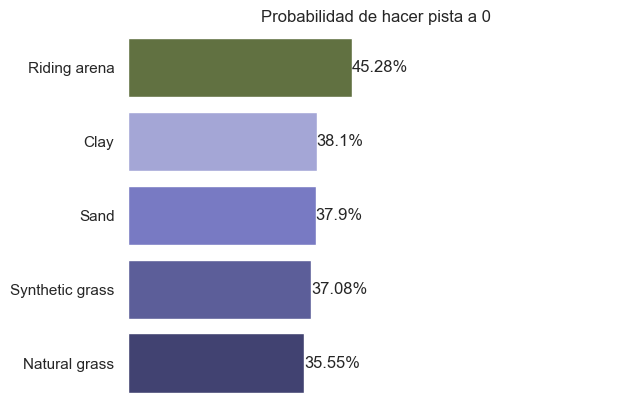

In [167]:
acero_terra = df_terra_relativo.sort_values(by="EXC_0", ascending=False)

sns.barplot(y= acero_terra.index, x= acero_terra["EXC_0"], hue= acero_terra["EXC_0"], legend=False, palette= "tab20b")
plt.xlim(0,100)
plt.title("Probabilidad de hacer pista a 0")
plt.ylabel("")
plt.xlabel("")
plt.xticks([])
sns.despine(left=True, bottom=True)

for i, valor in enumerate(acero_terra["EXC_0"]):
    plt.text(valor, i, f"{round(valor, 2)}%", ha='left', va='center')

plt.savefig('./img/Suelo_a0.png', bbox_inches='tight')

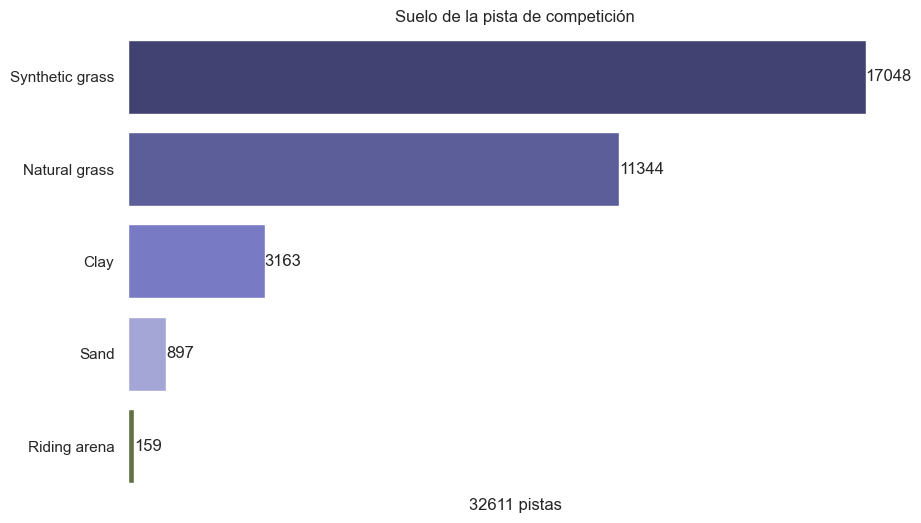

In [185]:
valor = df_agility["Floor"].value_counts().values
indice = df_agility["Floor"].value_counts().index

plt.figure(figsize=(10, 6))
sns.barplot(y= indice , x= valor, hue= indice, legend=False, palette= "tab20b")
plt.title(f"Suelo de la pista de competición")
plt.ylabel("")
plt.xlabel(f"{df_agility["Floor"].value_counts().sum()} pistas")
plt.xticks([])
sns.despine(left=True, bottom=True)

for i, valor in enumerate(valor):
    plt.text(valor, i, str(valor), ha='left', va='center')

plt.savefig('./img/Suelo_total.png', bbox_inches='tight')